# EDA del dataset 'Penetración Hogares'

## Librerías

### Librerías nativas

In [2]:
import warnings
import os

### Librerías instaladas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ignorar warnings

In [4]:
warnings.filterwarnings('ignore')

## Extracción del dataset

Ruta actual.

In [5]:
ruta_actual = os.getcwd()

ruta_actual

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\notebooks'

Ruta raíz del proyecto.

In [6]:
ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_proyecto

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones'

Ruta del dataset a extraer.

In [7]:
ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'data', 
    'penetracion_hogares.parquet'
    )

ruta_del_dataset

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\data\\penetracion_hogares.parquet'

Se extrae el dataset.

In [8]:
penetracion_hogares = pd.read_parquet(
    ruta_del_dataset, 
    engine='fastparquet'
    )

## Exploración del dataset

In [9]:
penetracion_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.840000
1,2024,2,Capital Federal,116.370000
2,2024,2,Catamarca,68.810000
3,2024,2,Chaco,44.060000
4,2024,2,Chubut,86.330000
...,...,...,...,...
995,2014,1,La Rioja,16.294105
996,2014,1,Mendoza,31.913123
997,2014,1,Misiones,23.136539
998,2014,1,Neuquén,49.791605


In [10]:
penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


Sin duplicados.

In [11]:
penetracion_hogares.duplicated(
    subset=['Año', 'Trimestre', 'Provincia']
    ).sum()

np.int64(0)

## Media de accesos por cada 100 hogares a nivel nacional

In [12]:
accesos_a_lo_largo_del_tiempo = pd.DataFrame(penetracion_hogares.groupby('Año', as_index=False)['Accesos por cada 100 hogares'].mean())

accesos_a_lo_largo_del_tiempo

,Año,Accesos por cada 100 hogares
0,2014,37.335129
1,2015,39.198153
2,2016,39.889283
3,2017,42.525228
4,2018,48.477593
5,2019,53.666356
6,2020,56.130637
7,2021,61.978518
8,2022,67.823625
9,2023,70.042812


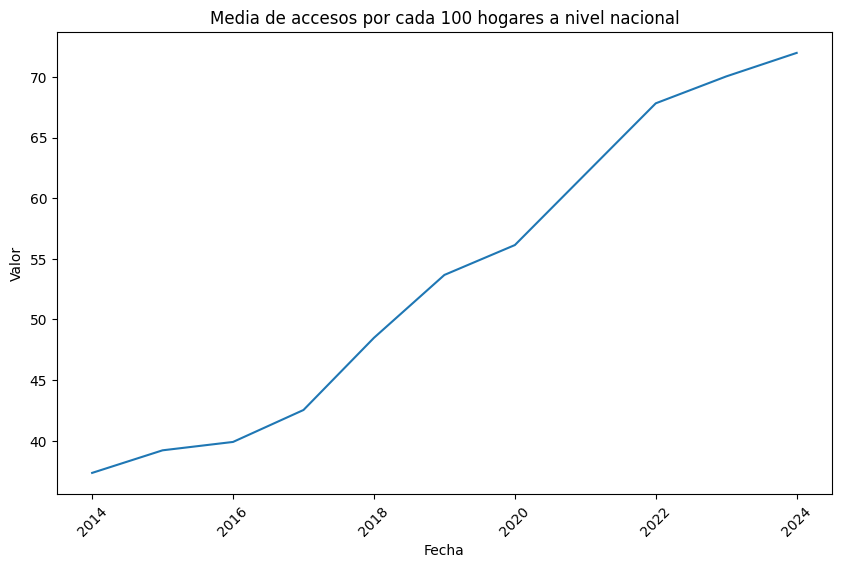

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=accesos_a_lo_largo_del_tiempo)
plt.title('Media de accesos por cada 100 hogares a nivel nacional')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

### Análisis del gráfico

El gráfico muestra una tendencia alcista marcada entre 2014 y el 2022. Luego la tendencia tiende a aplanarse hacia una meseta para el 2024.

## Accesos por cada 100 hogares en diferentes provincias (2024)

In [14]:
accesos_a_lo_largo_del_tiempo = pd.DataFrame(penetracion_hogares.groupby(['Año', 'Provincia'], as_index=False)[['Accesos por cada 100 hogares']].mean())

accesos_a_lo_largo_del_tiempo

,Año,Provincia,Accesos por cada 100 hogares
0,2014,Buenos Aires,55.620141
1,2014,Capital Federal,113.523688
2,2014,Catamarca,24.793693
3,2014,Chaco,21.164996
4,2014,Chubut,40.873343
...,...,...,...
259,2024,Santa Cruz,68.750000
260,2024,Santa Fe,80.870000
261,2024,Santiago Del Estero,49.540000
262,2024,Tierra Del Fuego,109.335000


In [15]:
accesos_a_lo_largo_del_tiempo[accesos_a_lo_largo_del_tiempo['Año'] == 2024]

,Año,Provincia,Accesos por cada 100 hogares
240,2024,Buenos Aires,80.470
241,2024,Capital Federal,117.950
242,2024,Catamarca,68.815
243,2024,Chaco,45.380
244,2024,Chubut,85.610
245,2024,Corrientes,51.660
246,2024,Córdoba,90.745
247,2024,Entre Ríos,68.975
248,2024,Formosa,39.650
249,2024,Jujuy,57.975


In [16]:
accesos_en_2023 = accesos_a_lo_largo_del_tiempo[accesos_a_lo_largo_del_tiempo['Año'] == 2023].copy()

In [17]:
accesos_en_2023.sort_values(inplace=True, by='Accesos por cada 100 hogares', ascending=False)

In [18]:
accesos_en_2023

,Año,Provincia,Accesos por cada 100 hogares
217,2023,Capital Federal,117.8725
238,2023,Tierra Del Fuego,106.7625
226,2023,La Pampa,98.4650
234,2023,San Luis,96.0500
222,2023,Córdoba,89.9225
220,2023,Chubut,84.3925
227,2023,La Rioja,80.1025
216,2023,Buenos Aires,80.0675
230,2023,Neuquén,79.3500
236,2023,Santa Fe,78.9500


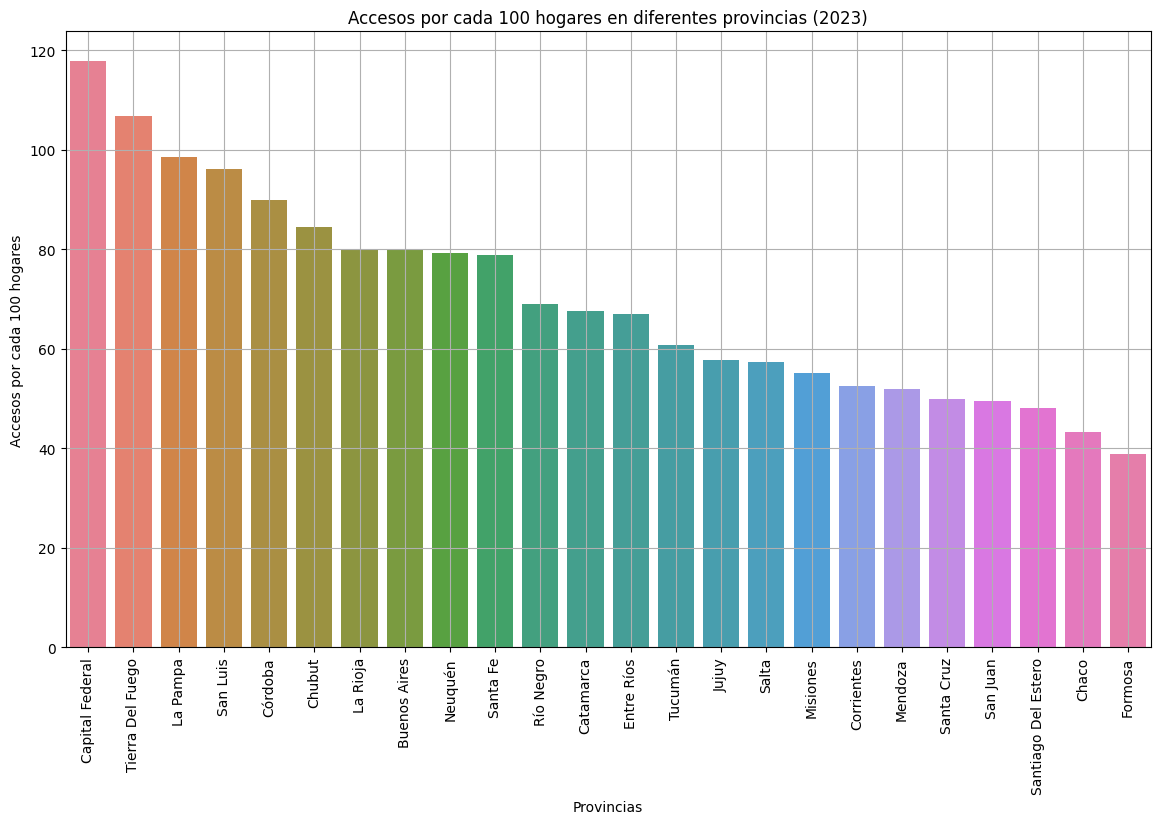

In [19]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', hue='Provincia', data=accesos_en_2023)
plt.title('Accesos por cada 100 hogares en diferentes provincias (2023)')
plt.xlabel('Provincias')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Análisis del gráfico

El gráfico indica que el mayor consumo hogareño está en Capital Federal y el menor en Formosa. La provincia de Buenos Aires tiene una mayor población pero está en el octavo lugar. Esto indica que la provincia de Buenos Aires puede seguir creciendo.

Tierra del Fuego está en segundo lugar. Su población es pequeña en comparacion con otras provincias.

Si Capital Federal concentra un elevado poder adquisitivo se puede pensar que Tierra del Fuego también podría tener esta característica.

Se recomienda invertir en Capital Federal y, al mismo tiempo, en la provincia de Buenos Aires.